## Plot xG Chart

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from highlight_text import fig_text, ax_text

import utils.probability_functions as pf
from utils.cleaning import create_team_df, align_dfs, chance_quality
from utils.metadata import *
import os
from mplsoccer import VerticalPitch,FontManager,add_image
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from adjustText import adjust_text


import requests
from bs4 import BeautifulSoup
import json

home_color = '#B94B5F'
away_color = '#4A5EB8'

In [3]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match

html = requests.get(url)
soup = BeautifulSoup(html.content, 'lxml')
scripts = soup.find_all('script')

strings = scripts[1].string

index_start = strings.index("('")+2
index_end = strings.index("')")
json_data = strings[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

x = []
y = []
minute = []
xG = []
result = []
team = []
player = []
shotType = []
assist = []
situation = []
lastAct = []

data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'player_assisted':
            assist.append(data_home[index][key])
        if key == 'shotType':
            shotType.append(data_home[index][key])
        if key == 'situation':
            situation.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        elif key == 'Y':
            y.append(data_away[index][key])
        elif key == 'minute':
            minute.append(data_away[index][key])
        elif key == 'a_team':
            team.append(data_away[index][key])
        elif key == 'xG':
            xG.append(data_away[index][key])
        elif key == 'result':
            result.append(data_away[index][key])
        elif key == 'player':
            player.append(data_away[index][key])
        elif key == 'player_assisted':
            assist.append(data_away[index][key])
        elif key == 'shotType':
            shotType.append(data_away[index][key])
        elif key == 'situation':
            situation.append(data_away[index][key])


col_names = [ 'minute', 'team','player', 'x', 'y', 'xG', 'result', 'shotType','assist',"situation"]
df = pd.DataFrame([minute, team, player, x, y, xG ,result ,shotType, assist, situation],index=col_names)
df = df.T
df = df.astype({'x':float, 'y':float, 'minute':int, 'xG':float,'player':str, 'shotType':str, 'assist':str, 'team':str, "situation":str})

# comp = str(input("please input match number.")) # ex #1
# season = str(input("please input season."))
# team = str(input("please input target team."))

# path = f'/work/assets/understats/{season}/{team}/'
# if not os.path.exists(path):
#     os.makedirs(path)
# df.to_csv(path+comp+'.csv')

Please enter the match id:  17387


In [4]:
df

,minute,team,player,x,y,xG,result,shotType,assist,situation
0,15,Barcelona,Gerard Piqué,0.916,0.570,0.069979,BlockedShot,Head,Dani Alves,FromCorner
1,17,Barcelona,Gavi,0.886,0.521,0.424343,MissedShots,LeftFoot,Ferrán Torres,OpenPlay
2,20,Barcelona,Ferrán Torres,0.758,0.694,0.016969,MissedShots,RightFoot,Gavi,OpenPlay
3,30,Barcelona,Pierre-Emerick Aubameyang,0.905,0.493,0.059680,MissedShots,Head,Adama Traoré,OpenPlay
4,31,Barcelona,Ferrán Torres,0.900,0.658,0.068412,SavedShot,LeftFoot,Pierre-Emerick Aubameyang,OpenPlay
5,36,Barcelona,Gerard Piqué,0.939,0.534,0.128551,ShotOnPost,Head,Dani Alves,FromCorner
6,36,Barcelona,Pierre-Emerick Aubameyang,0.937,0.460,0.139330,Goal,RightFoot,None,FromCorner
7,50,Barcelona,Ferrán Torres,0.860,0.627,0.078046,BlockedShot,RightFoot,None,OpenPlay
8,59,Barcelona,Sergio Busquets,0.746,0.484,0.029412,MissedShots,RightFoot,None,OpenPlay
9,60,Barcelona,Ferrán Torres,0.807,0.492,0.147261,BlockedShot,RightFoot,None,DirectFreekick


In [5]:
# df = pd.read_csv(path+comp+'.csv')

In [6]:
df_home, df_away = create_team_df(df)
home_team, away_team = df_home['team'][0], df_away['team'][0]
df_home_final, df_home_final1, df_away_final, df_away_final1 = align_dfs(df, df_home, df_away)
home_min_final = list(df_home_final['minute'].unique())
away_min_final = list(df_away_final['minute'].unique())
home_cum_xG_final = np.array(df_home_final1)
away_cum_xG_final = np.array(df_away_final1)
home_total_xG = '{:.2f}'.format(round(home_cum_xG_final[-1], 2))
away_total_xG = '{:.2f}'.format(round(away_cum_xG_final[-1], 2))

# Get probability of all scorelines from 0-0 to 9-9
home_goal_probs, away_goal_probs, scoreline_probs = pf.score_probability(float(home_total_xG),
                                                                         float(away_total_xG),
                                                                         num_goals=10)

# Prepare data for plotting
#create xs and ys for bar plots 
home_xs, home_ys = zip(*home_goal_probs)
away_xs, away_ys = zip(*away_goal_probs)

#get number of goals for each team
home_goals = len(df_home[df_home['result'] == 'Goal'])
away_goals = len(df_away[df_away['result'] == 'Goal'])
#get team colors
try:
    home_color = home_colors[home_team]
    away_color = away_colors[away_team]
except:
    home_color = home_color
    away_color = away_color

# Calculate win, loss and draw probabilities
home_prob, away_prob, draw_prob = pf.win_loss_draw_probs(scoreline_probs)

home_prob = int(round(home_prob*100, 0))
draw_prob = int(round(draw_prob*100, 0))
away_prob = int(round(away_prob*100, 0))

#concat to list
home_away_draw_probs = pd.DataFrame({'outcomes': ['home', 'away', 'draw'], 'probs': [home_prob, away_prob, draw_prob]})


In [7]:
df_home["assist"] = df_home["assist"].replace("None","unknown")
df_home["assist"][10]

'unknown'

In [8]:
background = '#131313'
text_color = '#ededed'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='serif'
mpl.rcParams['legend.fontsize'] = 15

#Loading Some Fonts
smooch = "https://github.com/googlefonts/smooch/blob/master/fonts/ttf/Smooch-Regular.ttf?raw=true"
spaceMono_italy = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
spaceMono_dance = "https://github.com/googlefonts/moondance/tree/master/fonts/ttf?raw=true"
# smoochFont = FontManager(smooch)
monoIFont = FontManager(spaceMono_italy)
monoBFont = FontManager(spaceMono_bold)
# monoDFont = FontManager(spaceMono_dance)

pitch_color = '#131313'
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)

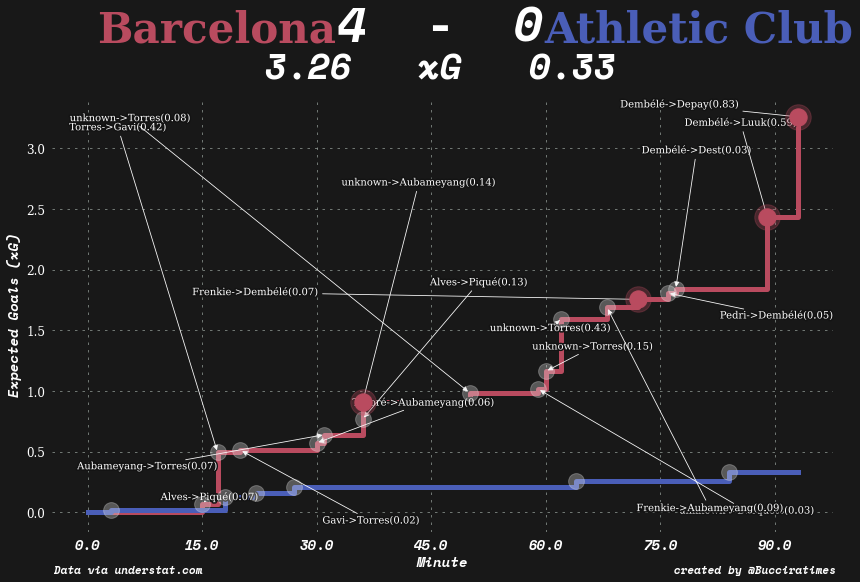

In [48]:
fig, ax = plt.subplots(figsize = (14,8))
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)

#set up our base layer
ax.tick_params(axis='x', bottom=False, labelsize=12, colors='w')
ax.tick_params(axis='y', left=False, labelsize=12, colors='w')

ax.set_frame_on(False)

#set grid
ax.grid(ls=(0, (5, 10)), lw=.5, color='#c7d5cc', axis='both', zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
ax.set_xticks([0,15,30,45,60,75,90, 105])


#plot the step graphs
ax.plot(home_min_final, home_cum_xG_final, drawstyle='steps-post',
        color=home_color, label=f'{home_team}', linewidth=5)

ax.plot(away_min_final, away_cum_xG_final, drawstyle='steps-post',
        color=away_color, label=f'{away_team}', linewidth=5)

#         ax.annotate(df_home["player"][i].split()[1] if df_home["player"][i].split()[1] is not None else df_home["player"][i].split()[0],
#                     xy=(df_home['minute'][i], df_home['cum_xG'][i]),
#                     xytext=(df_home['minute'][i]*1.1, df_home['cum_xG'][i]*1.1), color="#ededed",
#                     arrowprops=dict(arrowstyle='-|>', linewidth=.8, color="white", alpha=.98))
        
# text_values = df_home[['minute','cum_xG','player',"assist"]].values 



texts = []

def shotAnnotater(df):
    '''
    df -> df_home or df_away 
    '''
    
    for i in range(len(df)):

        try:
            assist_player = df["assist"][i].split()[1]+"->" 
            if assist_player == "de->":
                assist_player = df["assist"][i].split()[0]+"->"
        except:
            assist_player = df["assist"][i].split()[0]+"->"

        try:
            shot_player = df["player"][i].split()[1]+ "("+str(round(df["xG"][i],2))+")"
            if shot_player == f"de("+str(round(df["xG"][i],2))+")":
                shot_player = df["player"][i].split()[0]+ "("+str(round(df["xG"][i],2))+")"
        except:
            shot_player = df["player"][i].split()[0]+ "("+str(round(df["xG"][i],2))+")"
            
        try:
            if df["situation"][i]=="Penalty":
                assist_player = "PK:"
        except:
            pass

        annotater = ax.annotate(text=assist_player+shot_player,
                    xy=(df['minute'][i], df['cum_xG'][i]),
                    xytext=(df['minute'][i], df['cum_xG'][i]), color="white", 
                    arrowprops=dict(arrowstyle='-|>', linewidth=.8, color="white", alpha=.98))
        texts.append(annotater)


    [text.set_path_effects([mpl.patheffects.withStroke(
        linewidth=3, foreground=background
    )]) for text in texts]

    adjust_text(
        texts, autoalign='xy',
        only_move={'points':'y', 'text':'xy'}, 
        force_objects=(0.5, 1.5), force_text=(0.5, 1.5), 
        force_points=(0.5, 1.5)
    )        

shotAnnotater(df_home)

for i in range(len(df_home)):
    if (df_home["result"][i] != "Goal")&(df_home["result"][i] != "OwnGoal"):
        ax.scatter(df_home['minute'][i], df_home['cum_xG'][i], 
            s=250, zorder=9, facecolor="#ededed", alpha=0.3)
        
for i in range(len(df_away)):
    if (df_away["result"][i] != "Goal")&(df_away["result"][i] != "OwnGoal"):
        ax.scatter(df_away['minute'][i], df_away['cum_xG'][i], 
            s=250, zorder=9, facecolor="#ededed", alpha=0.3)
        

for i in range(len(df_home)):
    if df_home['result'][i] == 'Goal':
        ax.scatter(df_home['minute'][i], df_home['cum_xG'][i], 
                    s=300, zorder=10, facecolor=home_color, label='Mål')
        ax.scatter(df_home['minute'][i], df_home['cum_xG'][i], 
            s=650, zorder=9, facecolor=home_color, alpha=0.3)
        
for i in range(len(df_away)):
    if df_away['result'][i] == 'OwnGoal':
        ax.scatter(df_away['minute'][i], df_away['cum_xG'][i], 
                    s=300, zorder=10, facecolor=home_color, label='Mål')
        ax.scatter(df_away['minute'][i], df_away['cum_xG'][i], 
                    s=650, zorder=9, facecolor=home_color, alpha=0.3)
        
# #plot away goals
# for i in range(len(df_away_final)):
#     if df_away_final['result'][i] == 'Goal':
#         ax.scatter(df_away_final['minute'][i], df_away_final['cum_xG_x'][i], 
#                     s=300, zorder=10, facecolor=away_color, label='Mål')
#         ax.scatter(df_away_final['minute'][i], df_away_final['cum_xG_x'][i], 
#                     s=650, zorder=9, facecolor=away_color, alpha=0.3)
# for i in range(len(df_home_final)):
#     if df_home_final['result'][i] == 'OwnGoal':
#         ax.scatter(df_home_final['minute'][i], df_away_final['cum_xG_x'][i], 
#                     s=300, zorder=10, facecolor=away_color, label='Mål')
#         ax.scatter(df_home_final['minute'][i], df_away_final['cum_xG_x'][i], 
#                     s=650, zorder=9, facecolor=away_color, alpha=0.3)
        
        
path_eff = [path_effects.Stroke(linewidth=2, foreground='black'),
            path_effects.Normal()]
        
# Set x and y labels
ax.set_xlabel('Minute', color='white', fontdict={"color":"white","fontsize":14,"fontproperties":monoBFont.prop})
ax.set_ylabel('Expected Goals (xG)', fontdict={"color":"white","fontsize":14,"fontproperties":monoBFont.prop})
ax.set_xticks(np.linspace(0,90,7))
ax.set_xticklabels(np.linspace(0,90,7),fontdict={"color":"white","fontsize":14,"fontproperties":monoBFont.prop})

# Add signature and data source
ax.text(15, -0.5, s='Data via understat.com', ha='right',
        fontdict={"color":"white","fontsize":11,"fontproperties":monoBFont.prop})
ax.text(98, -0.5, s='created by @Bucciratimes', ha='right',
        fontstyle='normal', fontdict={"color":"white","fontsize":11,"fontproperties":monoBFont.prop})

# Add home and away team names
fig_text(x=0.42, y=0.96, s = f'<{home_team}> ', 
         fontsize=42, color='white', ha='right', highlight_colors=[home_color],
         highlight_weights='bold')
fig_text(x=0.6, y=0.96, s = f' <{away_team}>', 
         fontsize=42, color='white', ha='left', highlight_colors=[away_color],
         highlight_weights='bold')

# Add home and away goals
fig_text(x=0.51, y=0.96, s = f'<{home_goals}>  -  <{away_goals}>', 
         fontsize=48, color='white', ha='center', highlight_colors=['w', 'w'],
         highlight_weights='bold', fontweight='bold',fontdict={"color":"white","fontsize":11,"fontproperties":monoBFont.prop})

# Add home and away xG totals
fig_text(x=0.51, y=0.90, s = f'<{home_total_xG}>   xG   <{away_total_xG}>', 
         fontsize=36, color='white', ha='center', highlight_colors=['w', 'w'],
         highlight_weights='bold', fontweight='bold',fontdict={"color":"white","fontsize":11,"fontproperties":monoBFont.prop})


# plt.savefig(f'/work/output/{home_team}_vs_{away_team}_xG_racechart.png', dpi=200, 
#            bbox_inches='tight', facecolor=facecolor, edgecolor='none')

plt.show()

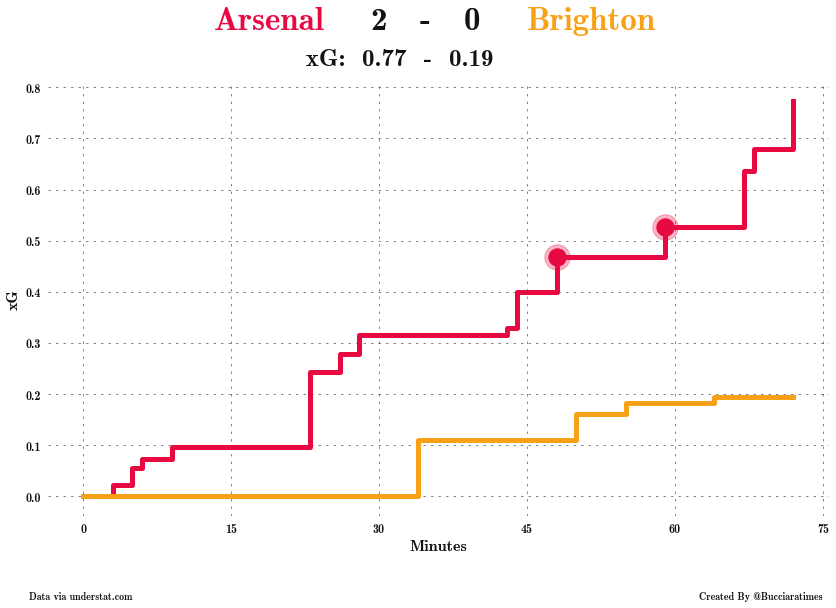

In [100]:
fig, ax = plt.subplots(figsize = (14,8))

white_theme1 = "#ffffff"
white_theme2 = "#131313"


fig.set_facecolor(white_theme1)
ax.set_facecolor(white_theme1)

#set up our base layer
ax.tick_params(axis='x', bottom=False, labelsize=12, colors=white_theme2)
ax.tick_params(axis='y', left=False, labelsize=12, colors=white_theme2)

ax.set_frame_on(False)

#set grid
ax.grid(ls=(0, (5, 10)), lw=.5, color=white_theme2, axis='both', zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
ax.set_xticks([0,15,30,45,60,75,90, 105])


#plot the step graphs
ax.plot(home_min_final, home_cum_xG_final, drawstyle='steps-post',
        color=home_color, label=f'{home_team}', linewidth=5)

ax.plot(away_min_final, away_cum_xG_final, drawstyle='steps-post',
        color=away_color, label=f'{away_team}', linewidth=5)

for i in range(len(df_home_final)):
    if df_home_final['result'][i] == 'Goal':
        ax.scatter(df_home_final['minute'][i], df_home_final['cum_xG_x'][i], 
                    s=300, zorder=10, facecolor=home_color, label='Mål')
        ax.scatter(df_home_final['minute'][i], df_home_final['cum_xG_x'][i], 
            s=650, zorder=9, facecolor=home_color, alpha=0.3)
for i in range(len(df_away_final)):
    if df_away_final['result'][i] == 'OwnGoal':
        ax.scatter(df_away_final['minute'][i], df_home_final['cum_xG_x'][i], 
                    s=300, zorder=10, facecolor=home_color, label='Mål')
        ax.scatter(df_away_final['minute'][i], df_home_final['cum_xG_x'][i], 
                    s=650, zorder=9, facecolor=home_color, alpha=0.3)
        
#plot away goals
for i in range(len(df_away_final)):
    if df_away_final['result'][i] == 'Goal':
        ax.scatter(df_away_final['minute'][i], df_away_final['cum_xG_x'][i], 
                    s=300, zorder=10, facecolor=away_color, label='Mål')
        ax.scatter(df_away_final['minute'][i], df_away_final['cum_xG_x'][i], 
                    s=650, zorder=9, facecolor=away_color, alpha=0.3)
for i in range(len(df_home_final)):
    if df_home_final['result'][i] == 'OwnGoal':
        ax.scatter(df_home_final['minute'][i], df_away_final['cum_xG_x'][i], 
                    s=300, zorder=10, facecolor=away_color, label='Mål')
        ax.scatter(df_home_final['minute'][i], df_away_final['cum_xG_x'][i], 
                    s=650, zorder=9, facecolor=away_color, alpha=0.3)

        
# Set x and y labels
ax.set_xlabel('Minutes', color=white_theme2, fontsize=16)
ax.set_ylabel('xG', color=white_theme2, fontsize=16)

# Add signature and data source
ax.text(5, -0.2, s='Data via understat.com', ha='right',
        fontsize=10, fontstyle='normal', color=white_theme2)
ax.text(75, -0.2, s='Created By @Bucciaratimes', fontsize=10, fontstyle='normal', color=white_theme2, ha='right')

# Add home and away team names
fig_text(x=0.4, y=0.96, s = f'<{home_team}>', 
         fontsize=33, color=white_theme2, ha='right', highlight_colors=[home_color],
         highlight_weights='bold')
fig_text(x=0.6, y=0.96, s = f'<{away_team}>', 
         fontsize=33, color=white_theme2, ha='left', highlight_colors=[away_color],
         highlight_weights='bold')

# Add home and away goals
fig_text(x=0.5, y=0.96, s = f'<{home_goals}>   -   <{away_goals}>', 
         fontsize=33, color=white_theme2, ha='center', highlight_colors=[white_theme2, white_theme2],
         highlight_weights='bold', fontweight='bold')

# Add home and away xG totals
fig_text(x=0.47, y=0.90, s = f'  xG:  <{home_total_xG}>  -  <{away_total_xG}> ', 
         fontsize=25, color=white_theme2, ha='center', highlight_colors=[white_theme2, white_theme2],
         highlight_weights='normal', fontweight='normal')


#plt.savefig(f'output/{home_team}_vs_{away_team}_xG_racechart_{comp}.png', dpi=600, 
#            bbox_inches='tight', facecolor=facecolor, edgecolor='none')

plt.show()

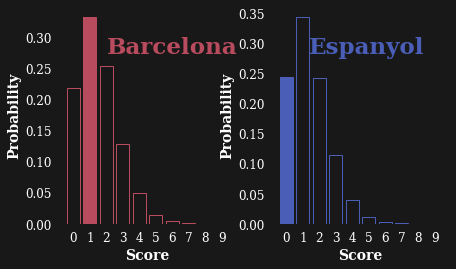

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (7,4))
fig.set_facecolor(facecolor)
ax1.set_facecolor(facecolor)
ax2.set_facecolor(facecolor)


# ------- ax1 -------- #
ax1.bar(home_xs, home_ys,
        facecolor=facecolor, edgecolor=home_color, zorder=10, alpha=1)
for i in home_xs:
    if i == home_goals:
        ax1.bar(i, home_ys[i],
        color=home_color, zorder=10, alpha=1)
#set up our base layer
ax1.tick_params(axis='x', colors='w', labelsize=12)
ax1.set_xticks(home_xs)
ax1.tick_params(axis='y', colors='w', labelsize=12)

# Set grid, ticks and frame
#ax1.grid(axis='y', color='w', linestyle='--', zorder=1, alpha=0.5)
ax1.tick_params(axis='both', which='both', left=False, bottom=False)
ax1.set_frame_on(False)

# Set labels and text
ax1.set_xlabel('Score',
               color='w', fontweight='bold', size=14)
ax1.set_ylabel('Probability',
               color='w', fontweight='bold', size=14)

# Annotate probabilities on the bars
for i, value in enumerate(home_ys):
        if value >= 1:
                ax1.text(i, value+0.5, f'{int(value)}%',
                         color='white', ha="center", fontweight='bold', fontsize=12, zorder=15)

# Add title
fig_text(s=f'<{home_team}>', x=0.48, y=0.7,
        highlight_colors=[home_color], highlight_weights=['bold'], fontsize=23, fontweight='bold', ha='right')

# ------- ax2 ---------- #
ax2.bar(away_xs, away_ys,
        facecolor=facecolor, edgecolor=away_color, zorder=10, alpha=1)
for i in away_xs:
    if i == away_goals:
        ax2.bar(i, away_ys[i],
        color=away_color, zorder=10, alpha=1)

#set up our base layer
ax2.tick_params(axis='x', colors='w', labelsize=12)
ax2.set_xticks(away_xs)
ax2.tick_params(axis='y', colors='w', labelsize=12)

# Set grid, ticks and frame
#ax1.grid(axis='y', color='w', linestyle='--', zorder=1, alpha=0.5)
ax2.tick_params(axis='both', which='both', left=False, bottom=False)
ax2.set_frame_on(False)

# Set labels and text
ax2.set_xlabel('Score',
               color='w', fontweight='bold', size=14)
ax2.set_ylabel('Probability',
               color='w', fontweight='bold', size=14)

# Annotate probabilities on the bars
for i, value in enumerate(away_ys):
        if value >= 1:
                ax2.text(i, value+0.5, f'{int(value)}%',
                         color='white', ha="center", fontweight='bold', fontsize=12, zorder=15)

# Add team names
fig_text(s=f'<{away_team}>', x=0.85, y=0.7,
        highlight_colors=[away_color], highlight_weights=['bold'], fontsize=23, fontweight='bold', ha='right')

plt.savefig(f'/work/output/image2.png', dpi=200, 
                   bbox_inches='tight', facecolor=facecolor, edgecolor='none')

plt.show()


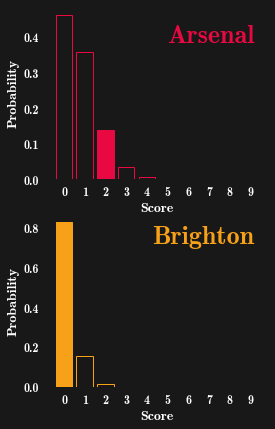

In [107]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (4,7))
fig.set_facecolor(facecolor)
ax1.set_facecolor(facecolor)
ax2.set_facecolor(facecolor)


# ------- ax1 -------- #
ax1.bar(home_xs, home_ys,
        facecolor=facecolor, edgecolor=home_color, zorder=10, alpha=1)
for i in home_xs:
    if i == home_goals:
        ax1.bar(i, home_ys[i],
        color=home_color, zorder=10, alpha=1)
#set up our base layer
ax1.tick_params(axis='x', colors='w', labelsize=12)
ax1.set_xticks(home_xs)
ax1.tick_params(axis='y', colors='w', labelsize=12)

# Set grid, ticks and frame
#ax1.grid(axis='y', color='w', linestyle='--', zorder=1, alpha=0.5)
ax1.tick_params(axis='both', which='both', left=False, bottom=False)
ax1.set_frame_on(False)

# Set labels and text
ax1.set_xlabel('Score',
               color='w', fontweight='bold', size=14)
ax1.set_ylabel('Probability',
               color='w', fontweight='bold', size=14)

# Annotate probabilities on the bars
for i, value in enumerate(home_ys):
        if value >= 1:
                ax1.text(i, value+0.5, f'{int(value)}%',
                         color='white', ha="center", fontweight='bold', fontsize=12, zorder=15)

# Add title
fig_text(s=f'<{home_team}>', x=0.85, y=0.8,
        highlight_colors=[home_color], highlight_weights=['bold'], fontsize=26, fontweight='bold', ha='right')

# ------- ax2 ---------- #
ax2.bar(away_xs, away_ys,
        facecolor=facecolor, edgecolor=away_color, zorder=10, alpha=1)
for i in away_xs:
    if i == away_goals:
        ax2.bar(i, away_ys[i],
        color=away_color, zorder=10, alpha=1)

#set up our base layer
ax2.tick_params(axis='x', colors='w', labelsize=12)
ax2.set_xticks(away_xs)
ax2.tick_params(axis='y', colors='w', labelsize=12)

# Set grid, ticks and frame
#ax1.grid(axis='y', color='w', linestyle='--', zorder=1, alpha=0.5)
ax2.tick_params(axis='both', which='both', left=False, bottom=False)
ax2.set_frame_on(False)

# Set labels and text
ax2.set_xlabel('Score',
               color='w', fontweight='bold', size=14)
ax2.set_ylabel('Probability',
               color='w', fontweight='bold', size=14)

# Annotate probabilities on the bars
for i, value in enumerate(away_ys):
        if value >= 1:
                ax2.text(i, value+0.5, f'{int(value)}%',
                         color='white', ha="center", fontweight='bold', fontsize=12, zorder=15)

# Add team names
fig_text(s=f'<{away_team}>', x=0.85, y=0.4,
        highlight_colors=[away_color], highlight_weights=['bold'], fontsize=26, fontweight='bold', ha='right')

#plt.savefig('output/goal_probabilities_viz.png',
#            dpi=600, bbox_inches='tight')


plt.show()


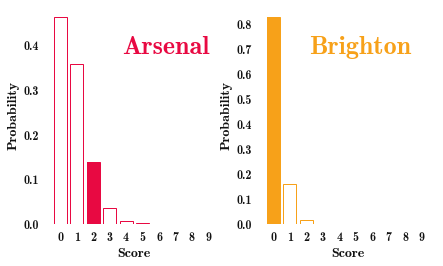

In [121]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (7,4))
fig.set_facecolor(white_theme1)
ax1.set_facecolor(white_theme1)
ax2.set_facecolor(white_theme1)


# ------- ax1 -------- #
ax1.bar(home_xs, home_ys,
        facecolor=white_theme1, edgecolor=home_color, zorder=10, alpha=1)
for i in home_xs:
    if i == home_goals:
        ax1.bar(i, home_ys[i],
        color=home_color, zorder=10, alpha=1)
#set up our base layer
ax1.tick_params(axis='x', colors=white_theme2, labelsize=12)
ax1.set_xticks(home_xs)
ax1.tick_params(axis='y', colors=white_theme2, labelsize=12)

# Set grid, ticks and frame
#ax1.grid(axis='y', color='w', linestyle='--', zorder=1, alpha=0.5)
ax1.tick_params(axis='both', which='both', left=False, bottom=False)
ax1.set_frame_on(False)

# Set labels and text
ax1.set_xlabel('Score',
               color=white_theme2, fontweight='bold', size=14)
ax1.set_ylabel('Probability',
               color=white_theme2, fontweight='bold', size=14)

# Annotate probabilities on the bars
for i, value in enumerate(home_ys):
        if value >= 1:
                ax1.text(i, value+0.5, f'{int(value)}%',
                         color=white_theme2, ha="center", fontweight='bold', fontsize=12, zorder=15)

# Add title
fig_text(s=f'<{home_team}>', x=0.45, y=0.7,
        highlight_colors=[home_color], highlight_weights=['bold'], fontsize=26, fontweight='bold', ha='right')

# ------- ax2 ---------- #
ax2.bar(away_xs, away_ys,
        facecolor=white_theme1, edgecolor=away_color, zorder=10, alpha=1)
for i in away_xs:
    if i == away_goals:
        ax2.bar(i, away_ys[i],
        color=away_color, zorder=10, alpha=1)

#set up our base layer
ax2.tick_params(axis='x', colors=white_theme2, labelsize=12)
ax2.set_xticks(away_xs)
ax2.tick_params(axis='y', colors=white_theme2, labelsize=12)

# Set grid, ticks and frame
#ax1.grid(axis='y', color='w', linestyle='--', zorder=1, alpha=0.5)
ax2.tick_params(axis='both', which='both', left=False, bottom=False)
ax2.set_frame_on(False)

# Set labels and text
ax2.set_xlabel('Score',
               color=white_theme2, fontweight='bold', size=14)
ax2.set_ylabel('Probability',
               color=white_theme2, fontweight='bold', size=14)

# Annotate probabilities on the bars
for i, value in enumerate(away_ys):
        if value >= 1:
                ax2.text(i, value+0.5, f'{int(value)}%',
                         color=white_theme2, ha="center", fontweight='bold', fontsize=12, zorder=15)

# Add team names
fig_text(s=f'<{away_team}>', x=0.85, y=0.7,
        highlight_colors=[away_color], highlight_weights=['bold'], fontsize=26, fontweight='bold', ha='right')

#plt.savefig('output/goal_probabilities_viz.png',
#            dpi=600, bbox_inches='tight')


plt.show()


findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.


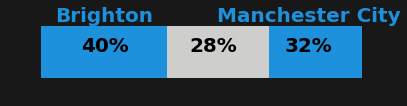

In [58]:
fig, ax = plt.subplots(figsize = (6,1))
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)

#set up our base layer
ax.tick_params(axis='x', bottom=False, labelsize=12, colors=facecolor)
ax.tick_params(axis='y', left=False, labelsize=12, colors=facecolor)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Plot bars
home = ax.barh(0.5, home_away_draw_probs['probs'][0], edgecolor=home_color,
               fill=True, facecolor=home_color,
               linewidth=3, height=0.8)
draw = ax.barh(0.5, home_away_draw_probs['probs'][1],
               left=home_away_draw_probs['probs'][0], edgecolor=text_color,
               facecolor=text_color, fill=True, linewidth=3, height=0.8)
away = ax.barh(0.5, home_away_draw_probs['probs'][2],
               left=home_away_draw_probs['probs'][0]+home_away_draw_probs['probs'][1], edgecolor=away_color,
               facecolor=away_color, fill=True, linewidth=3, height=0.8)

# Set texts
# Home
ax.text(x=home_prob/2, y=0.5, s=f'{home_prob}%',
        color='k', ha='center', size=20, fontweight='bold')
# Draw
ax.text(x=home_prob+draw_prob/2, y=0.5, s=f'{draw_prob}%',
        color='k', ha='center', size=20, fontweight='bold')
# Away
ax.text(x=home_prob+draw_prob+away_prob/2, y=0.5, s=f'{away_prob}%',
        color='k', ha='center', size=20, fontweight='bold')
# Home
ax.text(x=home_prob/2, y=0.99,
        s=f'{home_team}',
        color=home_color, ha='center', size=20, fontweight='bold')

ax.text(x=home_prob+draw_prob+away_prob/2, y=0.99,
        s=f'{away_team}',
        color=away_color, ha='center', size=20, fontweight='bold')

#plt.savefig('output/win_probability_viz.png',
#            dpi=600, bbox_inches='tight')

plt.show()


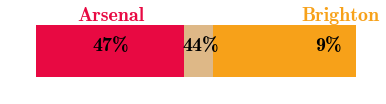

In [135]:
fig, ax = plt.subplots(figsize = (6,1))
fig.set_facecolor(white_theme1)
ax.set_facecolor(white_theme1)

#set up our base layer
ax.tick_params(axis='x', bottom=False, labelsize=12, colors=white_theme1)
ax.tick_params(axis='y', left=False, labelsize=12, colors=white_theme1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Plot bars
home = ax.barh(0.5, home_away_draw_probs['probs'][0], edgecolor=home_color,
               fill=True, facecolor=home_color,
               linewidth=3, height=0.8)
draw = ax.barh(0.5, home_away_draw_probs['probs'][1],
               left=home_away_draw_probs['probs'][0], edgecolor=text_color,
               facecolor=text_color, fill=True, linewidth=3, height=0.8)
away = ax.barh(0.5, home_away_draw_probs['probs'][2],
               left=home_away_draw_probs['probs'][0]+home_away_draw_probs['probs'][1], edgecolor=away_color,
               facecolor=away_color, fill=True, linewidth=3, height=0.8)

# Set texts
# Home
ax.text(x=home_prob/2, y=0.5, s=f'{home_prob}%',
        color='k', ha='center', size=20, fontweight='bold')
# Draw
ax.text(x=home_prob+draw_prob/9, y=0.5, s=f'{draw_prob}%',
        color='k', ha='center', size=20, fontweight='bold')
# Away
ax.text(x=home_prob+draw_prob+away_prob/10, y=0.5, s=f'{away_prob}%',
        color='k', ha='center', size=20, fontweight='bold')
# Home
ax.text(x=home_prob/2, y=0.99,
        s=f'{home_team}',
        color=home_color, ha='center', size=20, fontweight='bold')

ax.text(x=home_prob+draw_prob+away_prob/2, y=0.99,
        s=f'{away_team}',
        color=away_color, ha='center', size=20, fontweight='bold')

#plt.savefig('output/win_probability_viz.png',
#            dpi=600, bbox_inches='tight')

plt.show()
